# Sprint 06
#### Submitted By: Group 5
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

## Problem 1
***

In [2]:
df1 = pd.read_csv('problem2.csv')
df1

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


#### EDA and Data Cleaning

In [3]:
df1.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [4]:
df1 = df1.dropna()
df1.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [5]:
df1.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [6]:
# Converting all values in column days_before into numeric values
df1['days_before'] = df1['days_before'].str[0]
df1['days_before'] = pd.to_numeric(df1['days_before'])

/var/folders/h6/5m4gzhp15gl394vgtm1x4wgr0000gn/T/ipykernel_28370/4176217632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['days_before'] = df1['days_before'].str[0]
/var/folders/h6/5m4gzhp15gl394vgtm1x4wgr0000gn/T/ipykernel_28370/4176217632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['days_before'] = pd.to_numeric(df1['days_before'])


In [7]:
for column in ['day_of_week', 'time','category','attended']:
    print(f"Values in column {column}:")
    print(df1[column].unique())
    print()

Values in column day_of_week:
['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']

Values in column time:
['PM' 'AM']

Values in column category:
['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']

Values in column attended:
[0 1]



In [8]:
df1['day_of_week'].replace({'Fri.':'Fri','Monday':'Mon', 'Wednesday':'Wed'}, inplace=True)
print(df1['day_of_week'].unique())

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']


/var/folders/h6/5m4gzhp15gl394vgtm1x4wgr0000gn/T/ipykernel_28370/1307442224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day_of_week'].replace({'Fri.':'Fri','Monday':'Mon', 'Wednesday':'Wed'}, inplace=True)


In [9]:
print(f"The count of the string '-' in the category column is {df1['category'].value_counts()['-']}")

The count of the string '-' in the category column is 13


Since the count is less than 2%, let's truncate those values

In [10]:
df1 = df1[df1['category'] != '-']
print(df1['category'].unique())

['Strength' 'HIIT' 'Cycling' 'Yoga' 'Aqua']


In [11]:
print(df1['attended'].value_counts())

attended
0    1020
1     447
Name: count, dtype: int64


Summary Statistics:
        booking_id  months_as_member       weight  days_before     attended
count  1467.000000       1467.000000  1467.000000  1467.000000  1467.000000
mean    748.854806         15.664622    82.622379     3.005453     0.304703
std     433.964141         12.977391    12.781539     2.642134     0.460439
min       1.000000          1.000000    55.410000     1.000000     0.000000
25%     372.500000          8.000000    73.490000     1.000000     0.000000
50%     750.000000         12.000000    80.760000     2.000000     0.000000
75%    1125.500000         19.000000    89.520000     4.000000     1.000000
max    1500.000000        148.000000   170.520000     9.000000     1.000000

Histograms:


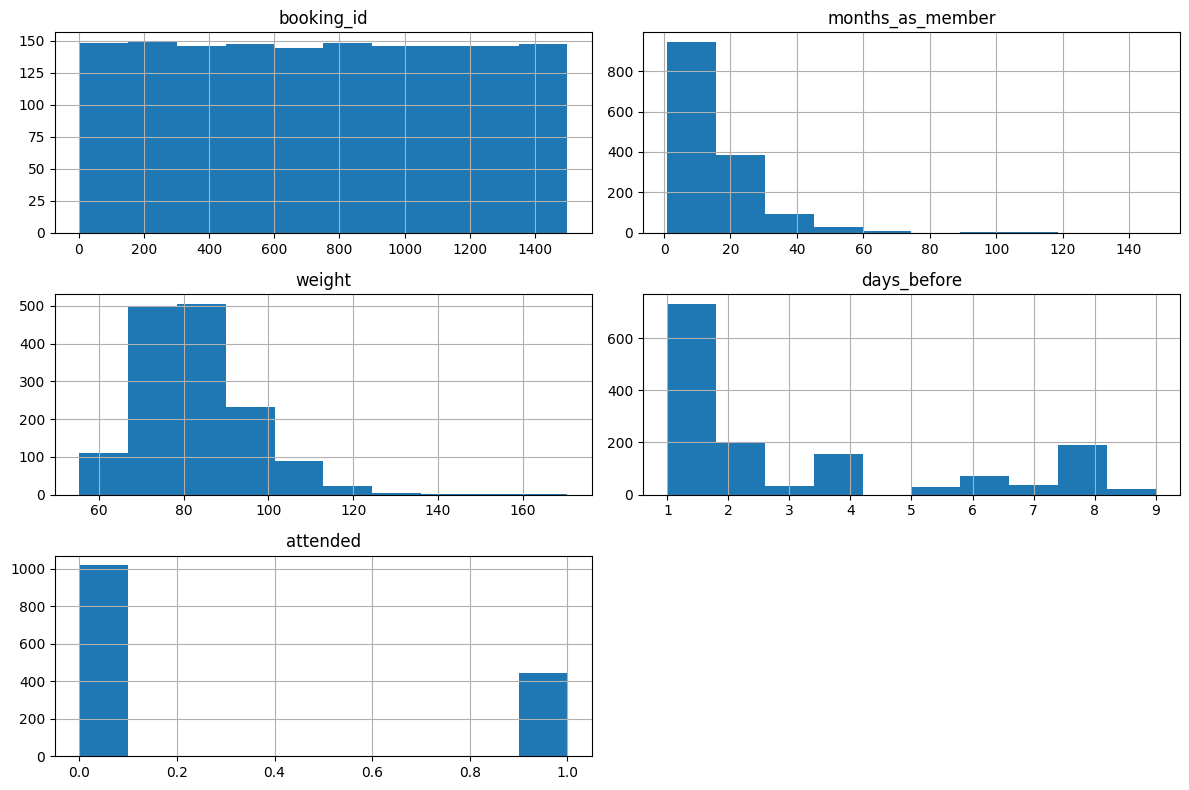


Box Plots:


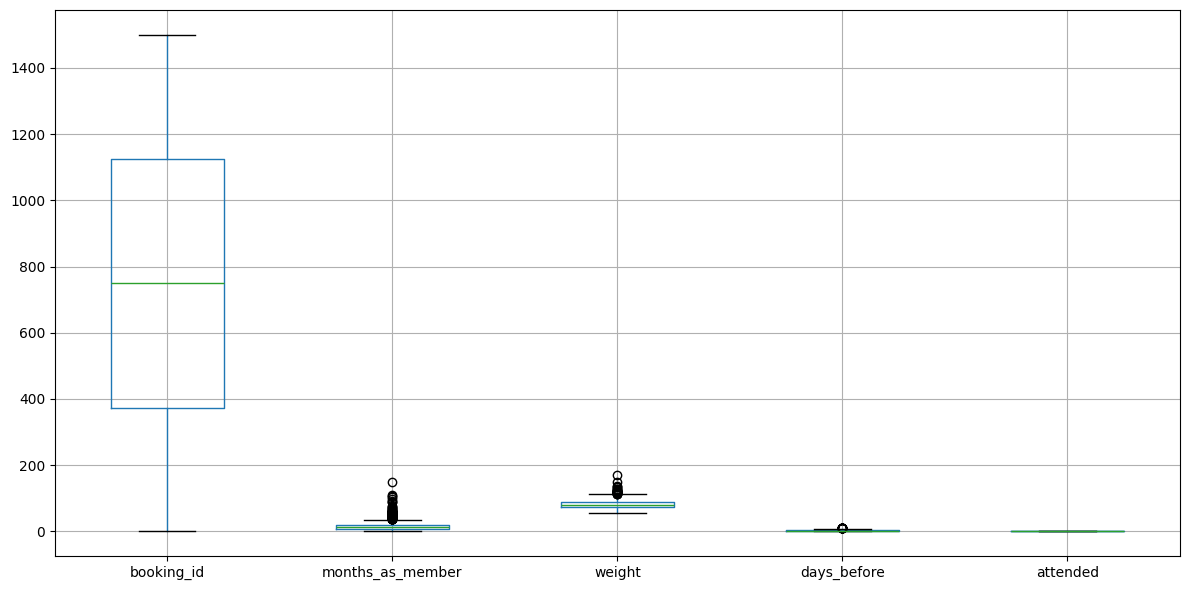


Correlation Heatmap:


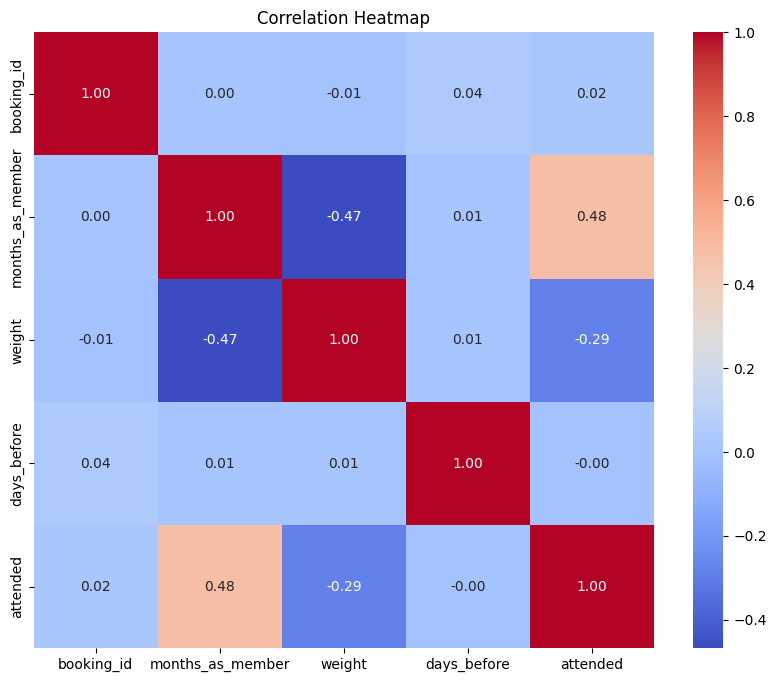

In [12]:
# Summary statistics
print("Summary Statistics:")
print(df1.describe())

# Histograms
print("\nHistograms:")
df1.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Box plots
print("\nBox Plots:")
df1.boxplot(figsize=(12, 6))
plt.tight_layout()
plt.show()

# Correlation heatmap
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 8))
sns.heatmap(df1.drop(columns=['day_of_week','time','category'], axis=0).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Creating train-test split

In [13]:
df1_new = df1.copy()

In [14]:
df1['time'].unique()

array(['PM', 'AM'], dtype=object)

In [15]:
label_encoder = LabelEncoder()
for cat in ['day_of_week','time','category']:
    df1_new[cat] = label_encoder.fit_transform(df1_new[cat])
print(df1_new)

      booking_id  months_as_member  weight  days_before  day_of_week  time  \
0              1                17   79.56            8            6     1   
1              2                10   79.01            2            1     0   
2              3                16   74.53            1            3     0   
3              4                 5   86.12            1            0     0   
4              5                15   69.29            8            4     0   
...          ...               ...     ...          ...          ...   ...   
1495        1496                21   79.51            1            0     0   
1496        1497                29   89.55            2            1     0   
1497        1498                 9   87.38            4            5     0   
1498        1499                34   68.64            1            3     0   
1499        1500                20   94.39            8            4     0   

      category  attended  
0            3         0  
1        

In [16]:
df1['time'].unique()

array(['PM', 'AM'], dtype=object)

In [17]:
X = df1_new.drop(columns=['attended', 'booking_id'], axis=0)
y = df1_new['attended']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
import xgboost as xgb

In [21]:
model = xgb.XGBRegressor(objective ='binary:logistic', random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='binary:logistic', ...)

In [22]:
y_pred = model.predict(X_test)

In [25]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, np.round(y_pred)) 
print("Accuracy of the model is :", accuracy)

Accuracy of the model is : 0.7448979591836735


In [43]:
def optimize_classes(df):
    # Creating a binary decision variables and map booking IDs to decision variables
    book_space_vars = {}
    for i, row in df.iterrows():
        book_space_vars[row['booking_id']] = LpVariable(f"book_space_{row['booking_id']}", cat='Binary')
    
    # Creating an optimization problem
    prob = LpProblem("Class_Optimization", LpMaximize)
    
    # Using the function to max out all the decision variables by sum
    prob += lpSum(book_space_vars.values())
    
    # Capacity constraint
    class_capacity = {'AM': 25, 'PM': 15}  # Assuming capacity based on time
    for time, group in df.groupby('time'):
        prob += lpSum(book_space_vars[row['booking_id']] for _, row in group.iterrows()) <= class_capacity[time]
    
    # Predictive constraint
    for _, row in df.iterrows():
        if row['attended'] == 0:
            prob += book_space_vars[row['booking_id']] == 1
    
    # Solve problem
    prob.solve()
    
    # Extract results
    results = [booking_id for booking_id, var in book_space_vars.items() if var.value() == 1]
    
    return results


In [45]:
additional_spaces = optimize_classes(df1, y_pred)
print("Possible Attendance:", len(additional_spaces))
print("Booking IDs to open additional spaces for:", additional_spaces)


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/aagnaykariyal/Documents/Github/python3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/h6/5m4gzhp15gl394vgtm1x4wgr0000gn/T/ffc31b0981884dd5a65c0a8634d4f437-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/h6/5m4gzhp15gl394vgtm1x4wgr0000gn/T/ffc31b0981884dd5a65c0a8634d4f437-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1027 COLUMNS
At line 7916 RHS
At line 8939 BOUNDS
At line 10407 ENDATA
Problem MODEL has 1022 rows, 1467 columns and 2487 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.02

Possible Attendance: 262
Booking IDs to open additional spaces for: [9, 11, 16, 29, 30, 31, 36, 37, 39, 54,

Adding a new column to show the predicted values

In [ ]:
df1['Possible_attendance'] = 'N'
df1.loc[df1['booking_id'].isin(additional_spaces), 'Possible_attendance'] = 'Y'

In [ ]:
df1['Possible_attendance'].value_counts()

Possible_attendance
N    1205
Y     262
Name: count, dtype: int64

## Problem 2
***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df2 = pd.read_csv('problem1.csv')
df2

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [ ]:
df2.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [ ]:
df2.dtypes

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object

In [ ]:
import xgboost as xgb

Summary Statistics:
       number_people     timestamp   day_of_week    is_weekend    is_holiday  \
count   62184.000000  62184.000000  62184.000000  62184.000000  62184.000000   
mean       29.072543  45799.437958      2.982504      0.282870      0.002573   
std        22.689026  24211.275891      1.996825      0.450398      0.050660   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         9.000000  26624.000000      1.000000      0.000000      0.000000   
50%        28.000000  46522.500000      3.000000      0.000000      0.000000   
75%        43.000000  66612.000000      5.000000      1.000000      0.000000   
max       145.000000  86399.000000      6.000000      1.000000      1.000000   

        temperature  is_start_of_semester  is_during_semester         month  \
count  62184.000000          62184.000000        62184.000000  62184.000000   
mean      58.557108              0.078831            0.660218      7.439824   
std        6.316396   

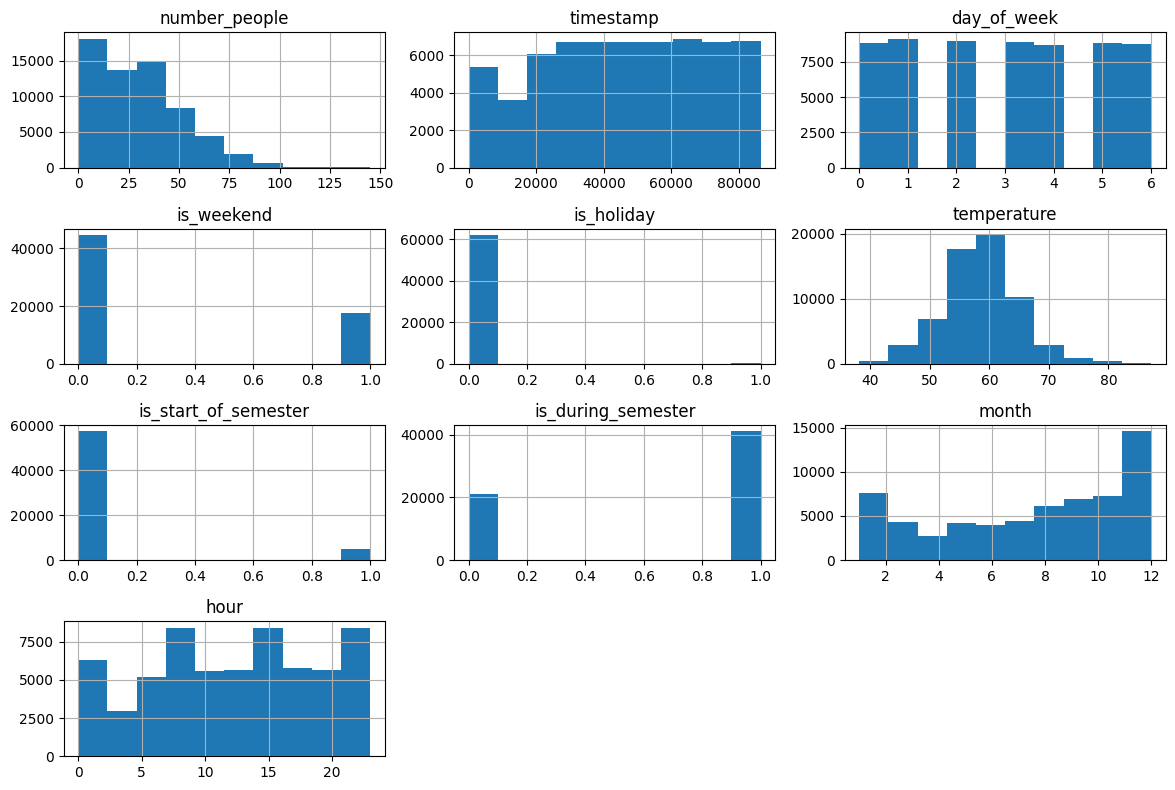


Box Plots:


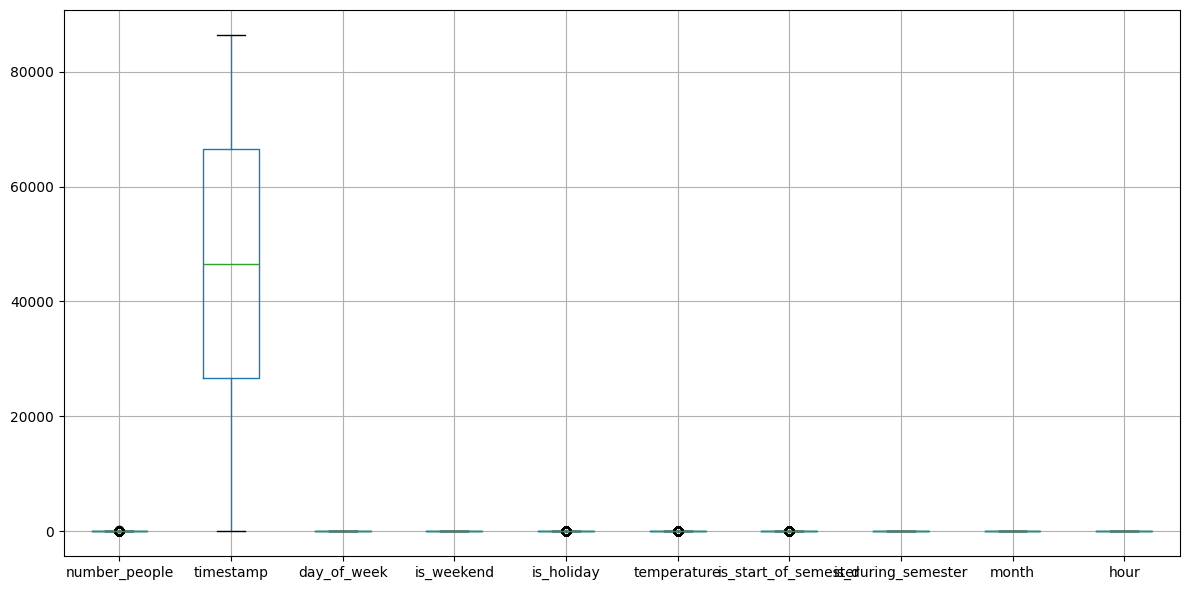


Correlation Heatmap:


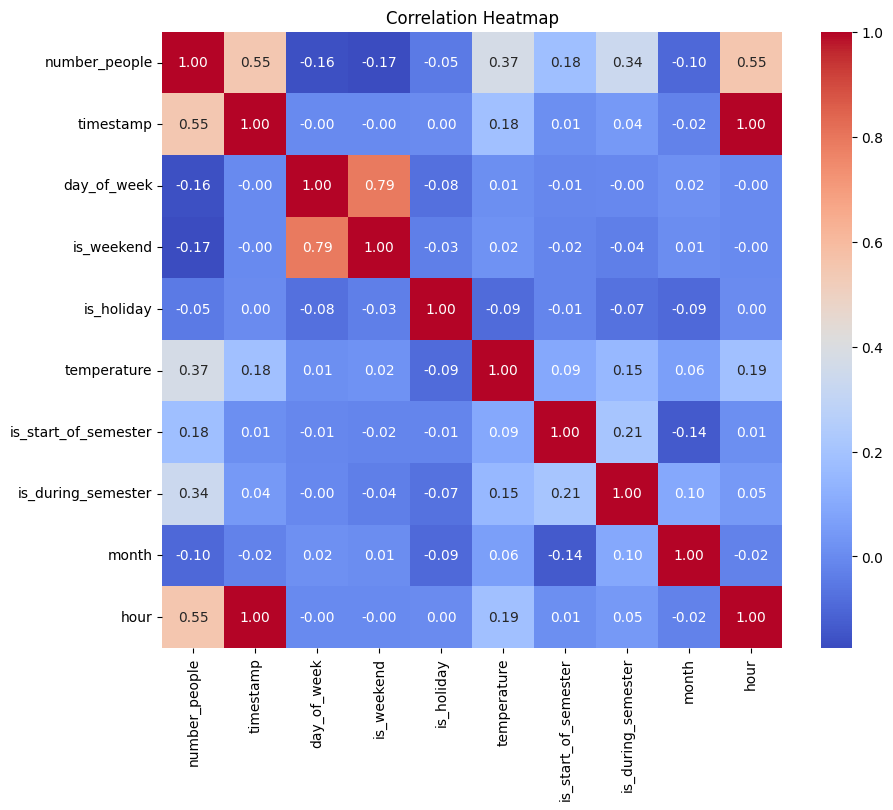

In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df2.describe())

# Histograms
print("\nHistograms:")
df2.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Box plots
print("\nBox Plots:")
df2.boxplot(figsize=(12, 6))
plt.tight_layout()
plt.show()

# Correlation heatmap
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 8))
sns.heatmap(df2.drop(columns=['date'], axis=0).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Since the data is not normalized, we decided to go with an XGBoost Regressor as it is extremely good in handling imbalanced datasets.<br> Now we convert the 'date' column with the object datatype to a datetype format first and then split it into multiple columns in a numerical format

In [ ]:
df2['date'] = pd.to_datetime(df2['date'], utc=True)
df2['year'] = df2['date'].dt.year
df2['day'] = df2['date'].dt.day
df2

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day
0,37,2015-08-15 00:00:11+00:00,61211,4,0,0,71.76,0,0,8,17,2015,15
1,45,2015-08-15 00:20:14+00:00,62414,4,0,0,71.76,0,0,8,17,2015,15
2,40,2015-08-15 00:30:15+00:00,63015,4,0,0,71.76,0,0,8,17,2015,15
3,44,2015-08-15 00:40:16+00:00,63616,4,0,0,71.76,0,0,8,17,2015,15
4,45,2015-08-15 00:50:17+00:00,64217,4,0,0,71.76,0,0,8,17,2015,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-19 01:42:28+00:00,67348,5,1,0,61.07,0,1,3,18,2017,19
62180,21,2017-03-19 01:52:35+00:00,67955,5,1,0,61.07,0,1,3,18,2017,19
62181,25,2017-03-19 02:02:40+00:00,68560,5,1,0,56.71,0,1,3,19,2017,19
62182,18,2017-03-19 02:12:47+00:00,69167,5,1,0,56.71,0,1,3,19,2017,19


In [ ]:
df2 = df2.drop(columns=['date'], axis=0)
df2.dtypes

number_people             int64
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
year                      int32
day                       int32
dtype: object

In [ ]:
# Selecting features and target variable
X = df2.drop(columns=['number_people'], axis=0)
y = df2['number_people']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model selection and training
model_2 = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
model_2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Evaluate the model on the testing set
y_pred = model_2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 6.127659848649112


In [ ]:
# Predictions for new data
# Assuming new_data contains similar features as the training data
test_data = X_test.iloc[[5]]
actual_result = y_test.iloc[5]
prediction = model_2.predict(test_data)
prediction = round(prediction[0])
print("Predicted gym crowding for new data:", prediction, "\nActual gym crowding for new data:", actual_result)


Predicted gym crowding for new data: 79 
Actual gym crowding for new data: 79
